In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Input:
dfa = pd.read_csv("Monitor 5.csv", index_col=0)
min_day=1440
#total_time = len(df.index)
#num_days = total_time//min_day
column=df.columns[1:]
#display(df)
df=dfa.iloc[:(9*1440)]
df.to_csv('USE-Monitor 5.csv')
df=pd.read_csv('USE-Monitor 5.csv', index_col=0)
display(df)

,Light,Monitor 5 Spider 1,Monitor 5 Spider 2,Monitor 5 Spider 3,Monitor 5 Spider 4,Monitor 5 Spider 5,Monitor 5 Spider 6,Monitor 5 Spider 7,Monitor 5 Spider 8,Monitor 5 Spider 9,...,Monitor 5 Spider 23,Monitor 5 Spider 24,Monitor 5 Spider 25,Monitor 5 Spider 26,Monitor 5 Spider 27,Monitor 5 Spider 28,Monitor 5 Spider 29,Monitor 5 Spider 30,Monitor 5 Spider 31,Monitor 5 Spider 32
Date-Time,,,,,,,,,,,,,,,,,,,,,
2019-06-29 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-06-29 00:01:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-06-29 00:02:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-06-29 00:03:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-06-29 00:04:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-07 23:55:00,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-07-07 23:56:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-07-07 23:57:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Create uniform y-axis limit
def create_ylimit(df):
    #find the standard deviation and mean of each column from the dataset without zeros
    df_limit=df.replace(0, np.nan)
    std=df_limit.std()
    mean=df_limit.mean()
    #Find mean and standard deviation of all of the data
    df_mean=np.mean(mean)
    df_std =np.mean(std)
    #y limit = mean of the dataframe plus 3 standard deviations
    y_limit = df_mean +3*df_std
    return y_limit

def plot_night_test(df):
    #Make a copy of the dataframe and create two columns for the difference between the light values and for the date and time
    dfc = df.copy()
    dfc['diff'] = dfc.Light.diff()
    dfc[["day", "time"]] = dfc["Date-Time"].str.split(" ", expand = True)
    #Separate by the difference to determine when the light is coming on or going off
    df_off = dfc.loc[dfc['diff'] == 1]
    df_on = dfc.loc[dfc['diff'] == -1]
    #display(dfc)
    #Assign variable from the lists
    start1 = dfc.time.values[0]
    end1 = df_off.time.values[0]
    start2 = df_on.time.values[0]
    end2 = dfc.time.values[-1]

    return start1, start2, end1, end2

#Plot activity in subplots
#Imput:Dataframe, List of spiders in df, Specific Spider from list, 
#Label for subplots, variable from "create_ylimit" funnction 
#All variables will be named in final raster plot function
def plot_raster( df, column, spider, ax, y, num_days, min_day): 
    
    for i in range(0,num_days):
        #Separate dataframe into sections of 1440 minutes(minutes in a day) and plot the 
        #activity for each day
        ax[i].plot(df['time'][min_day*i:min_day*(i+1)], df[column[spider]][min_day*i:min_day*(i+1)], color='blue')
        #Label each day
        ax[i].set_ylabel('d'+str(i+1))
        ax[i].set_xticks([])
        # the y limit is the mean plus 3 standard deviations
        ax[i].set_ylim(0,y)
        #setting instructions for shading the graph when the lights are off
        df1=df[min_day*(i):min_day*(i+1)]
        df1=df1.reset_index()
#         #Make DD plots all grey
#         if np.mean(df1.Light)==0:
#             ax[i].axvspan(0,min_day, alpha=.5,color='grey')
#         #Run function to determine when lights are off during LD cycle
#         else:
#             start1, start2, end1, end2 = plot_night_test(df1)
#             #print(start1, end1,start2, end2)
#             ax[i].axvspan(start1, end1, alpha=0.5, color='grey')
#             ax[i].axvspan(start2, end2,alpha=0.5, color='grey')
            
#Combine all funtions to make raster plots for all spiders given a data frame and list of spiders
def spider_raster(df):
    column=df.columns[1:]
    #create a copy and separate the date and time for reference
    df_time = df.copy()
    df_time=df_time.reset_index()
    df_time[["day", "time"]] = df_time["Date-Time"].str.split(" ", expand = True)
    #for loop for creating figures for the number of spiders in the dataframe
    for spider in  range(len(column)):
        #Determine length of usable data for each spider
        dftest=df[column[spider]].dropna()
        print(column[spider])
        total_time = len(df.index)
        num_days = total_time//min_day
        #Plot subplots
        fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True)
        fig.suptitle('The Free Running Period of: ' + column[spider], fontsize=16)        
        #setting the y axis limit
        y = create_ylimit(df) 
        #plotting the raster plots
        plot_raster(df_time, column, spider, ax, y, num_days, min_day)
        #plot x axis
        x=int(1440/4)
        ax[num_days-1].set_xticks([0,x,2*x,3*x,4*x],['0:00','6:00','12:00','18:00','24:00'])
        plt.xlabel('Subjective Time')
        #save figure
        #fig.savefig(column[spider] +'raster_DD_Period')
        plt.show()
        print('Next spider')

In [ ]:
spider_raster(df)

In [9]:
dfa = pd.read_csv("Monitor 5.csv", index_col=0)
dfa=dfa.iloc[9*1440:]
display(dfa)

,Light,Monitor 5 Spider 1,Monitor 5 Spider 2,Monitor 5 Spider 3,Monitor 5 Spider 4,Monitor 5 Spider 5,Monitor 5 Spider 6,Monitor 5 Spider 7,Monitor 5 Spider 8,Monitor 5 Spider 9,...,Monitor 5 Spider 23,Monitor 5 Spider 24,Monitor 5 Spider 25,Monitor 5 Spider 26,Monitor 5 Spider 27,Monitor 5 Spider 28,Monitor 5 Spider 29,Monitor 5 Spider 30,Monitor 5 Spider 31,Monitor 5 Spider 32
Date-Time,,,,,,,,,,,,,,,,,,,,,
2019-07-08 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-07-08 00:01:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-07-08 00:02:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-07-08 00:03:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-07-08 00:04:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-14 23:55:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-07-14 23:56:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-07-14 23:57:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Monitor 5 Spider 1


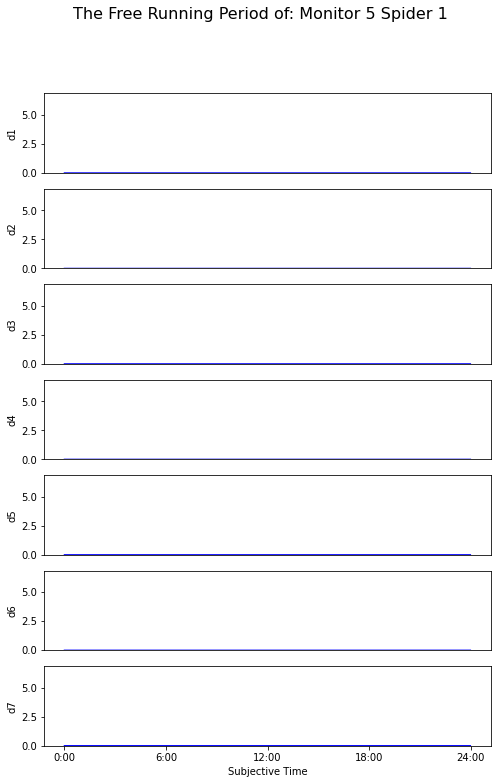

Next spider
Monitor 5 Spider 2


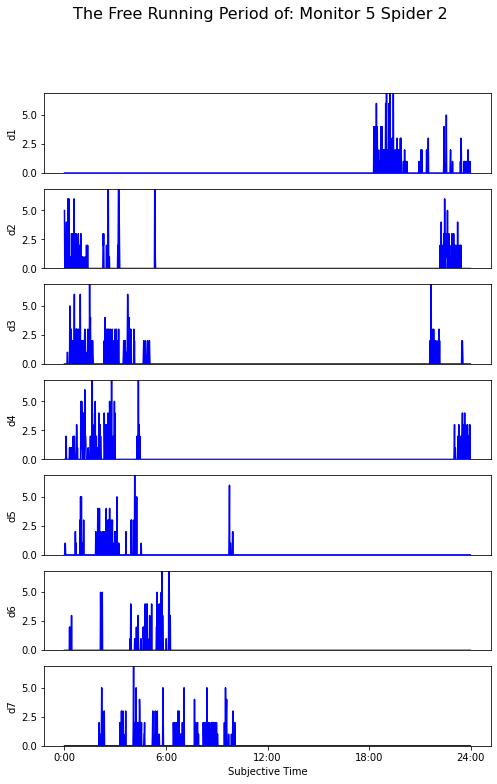

Next spider
Monitor 5 Spider 3


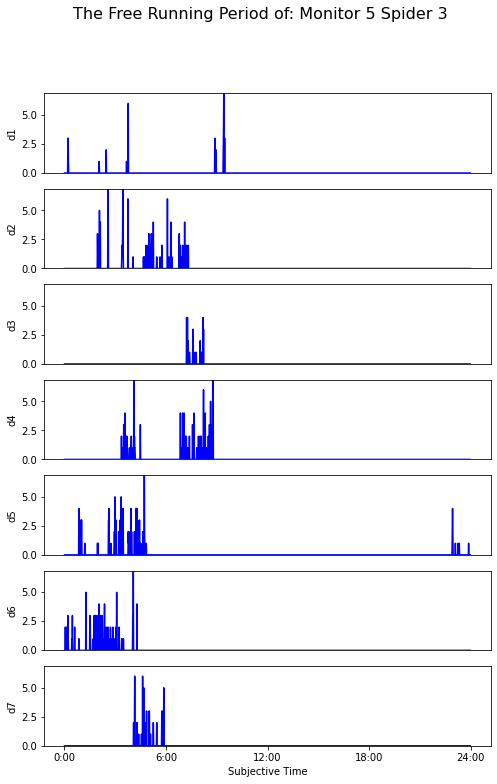

Next spider
Monitor 5 Spider 4


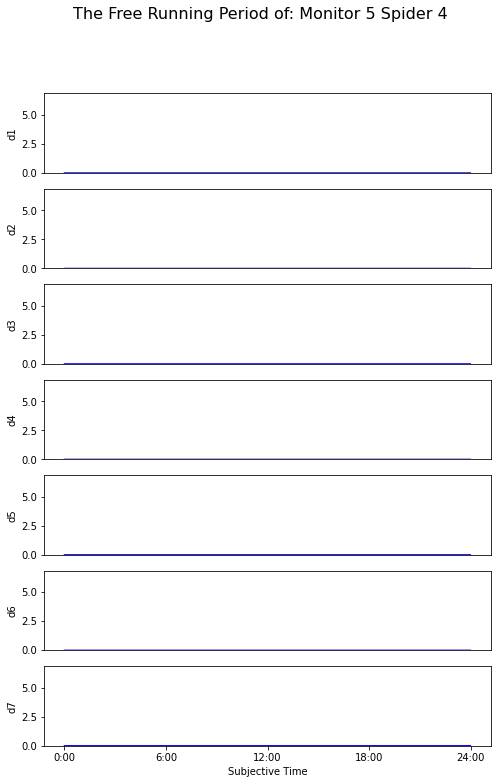

Next spider
Monitor 5 Spider 5


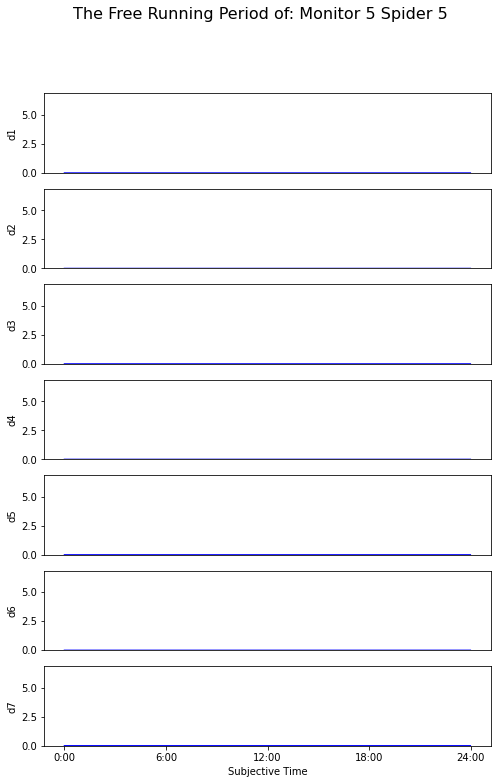

Next spider
Monitor 5 Spider 6


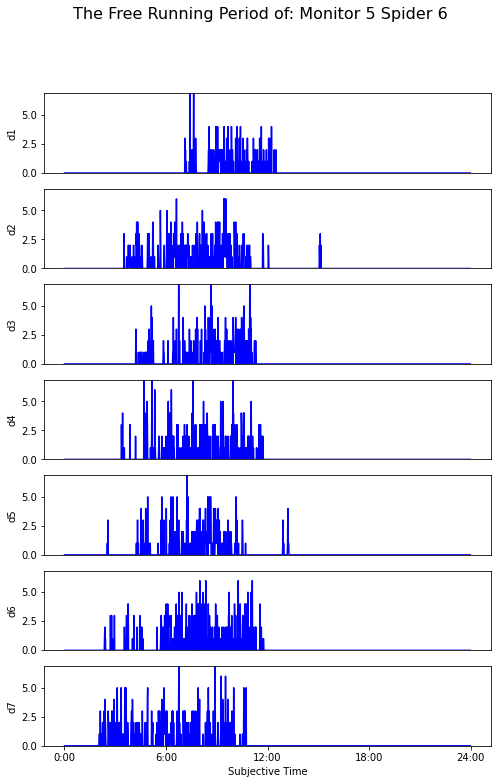

Next spider
Monitor 5 Spider 7


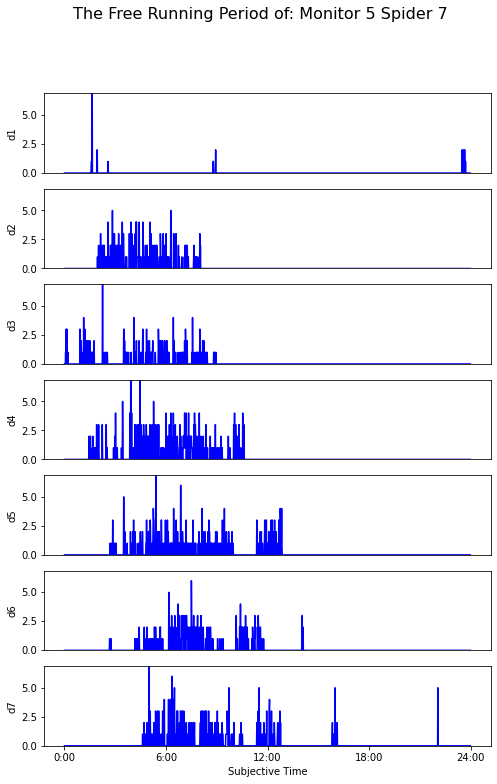

Next spider
Monitor 5 Spider 8


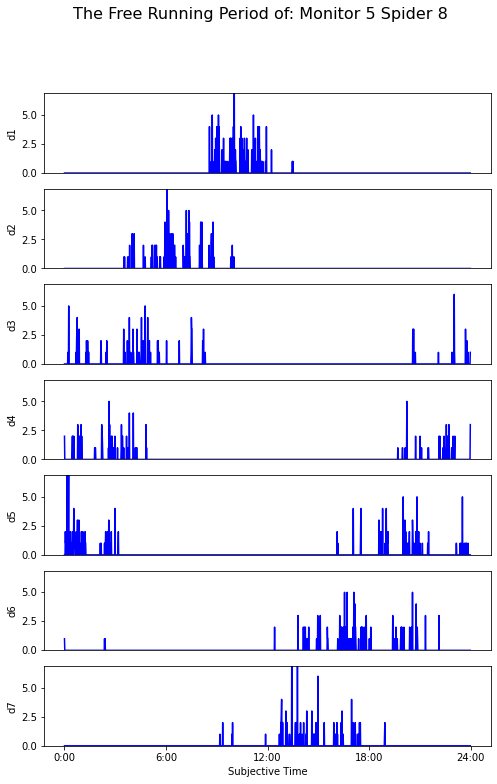

Next spider
Monitor 5 Spider 9


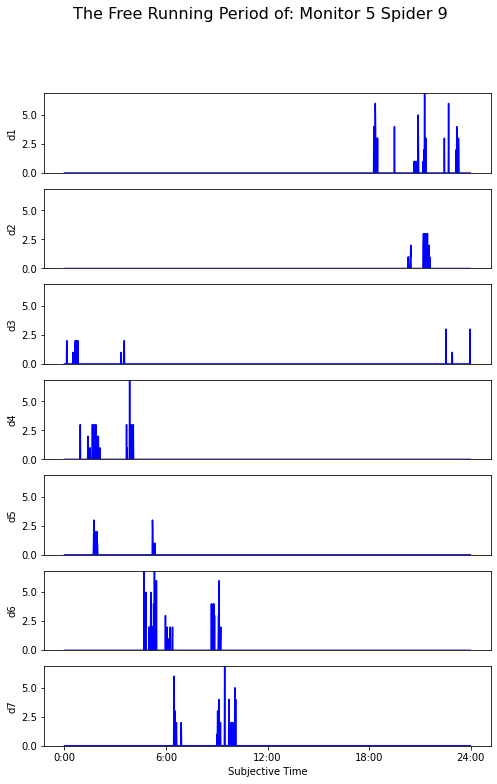

Next spider
Monitor 5 Spider 10


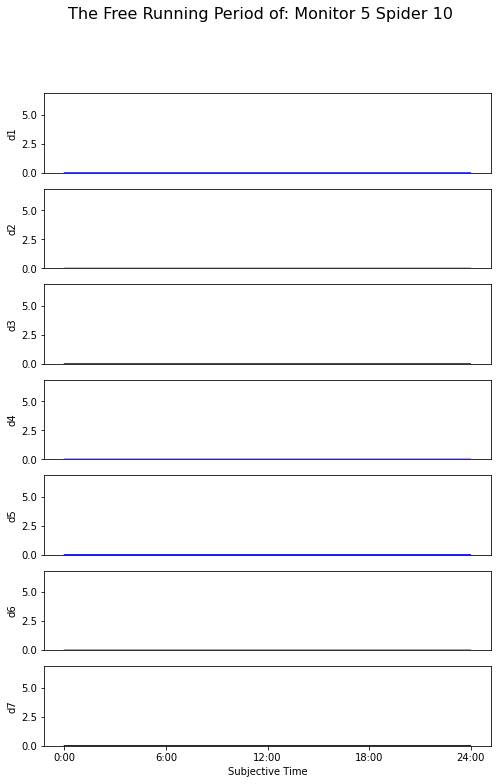

Next spider
Monitor 5 Spider 11


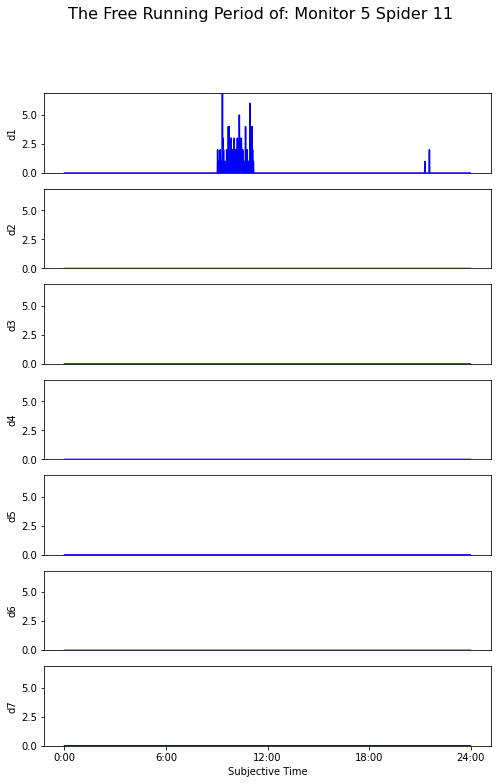

Next spider
Monitor 5 Spider 12


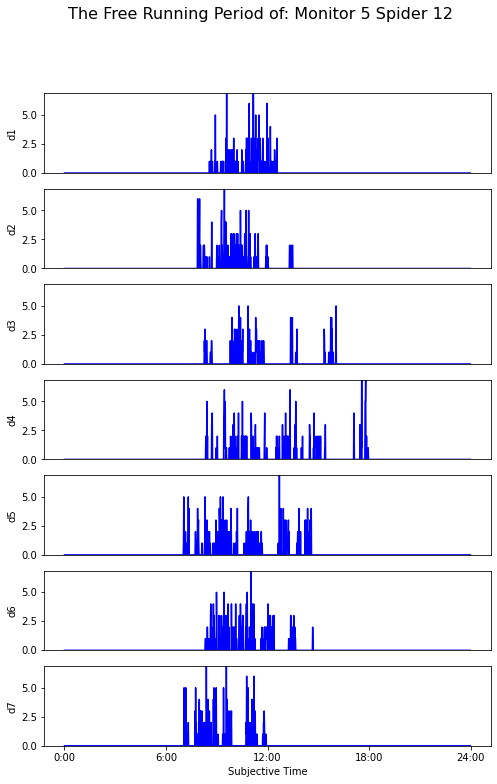

Next spider
Monitor 5 Spider 13


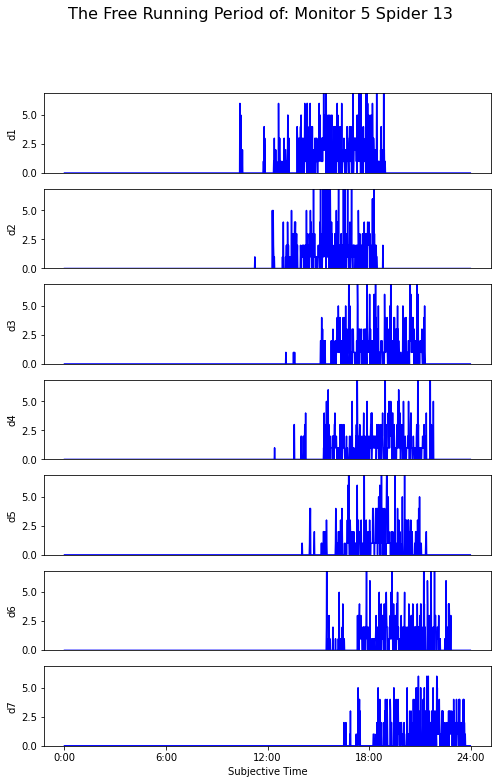

Next spider
Monitor 5 Spider 14


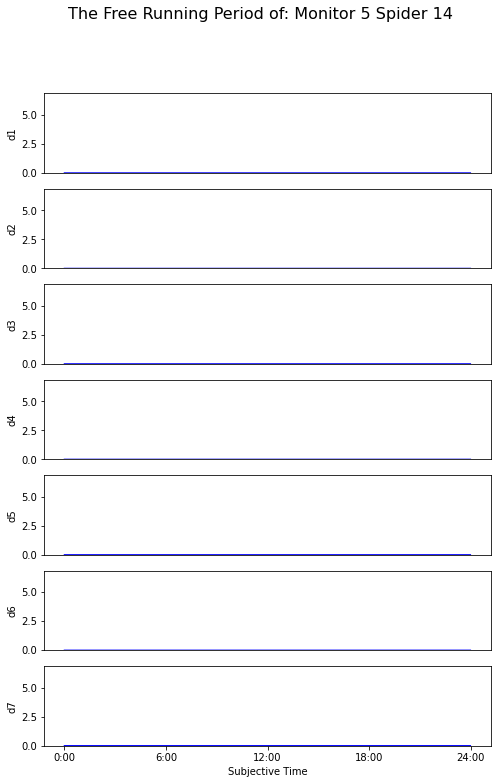

Next spider
Monitor 5 Spider 15


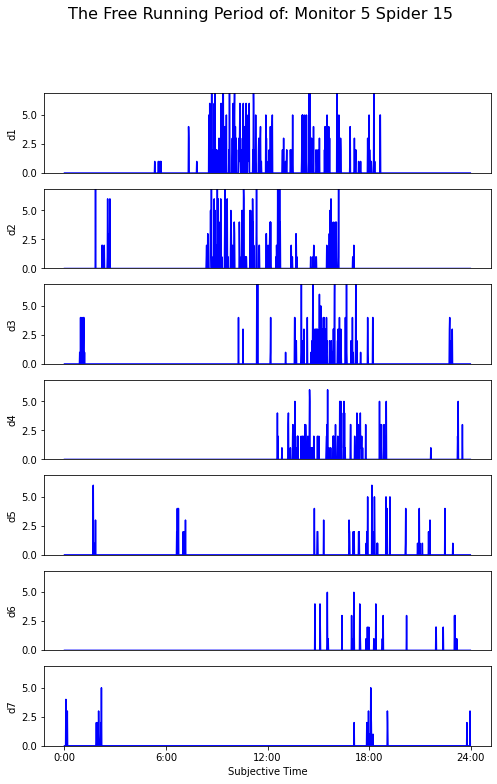

Next spider
Monitor 5 Spider 16


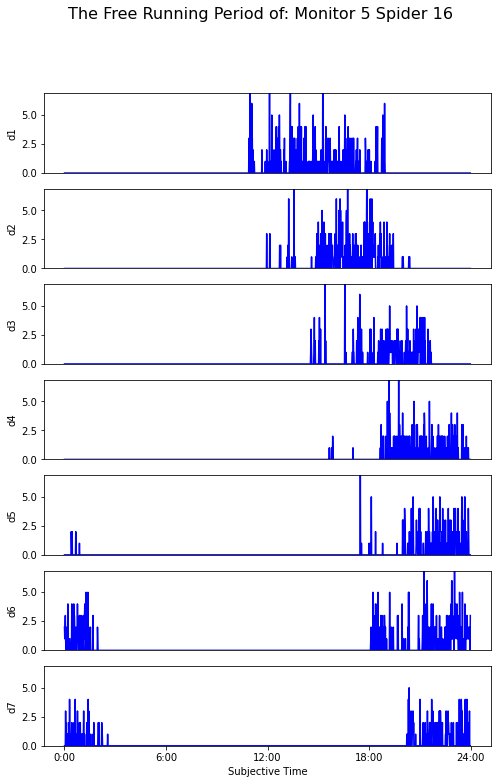

Next spider
Monitor 5 Spider 17


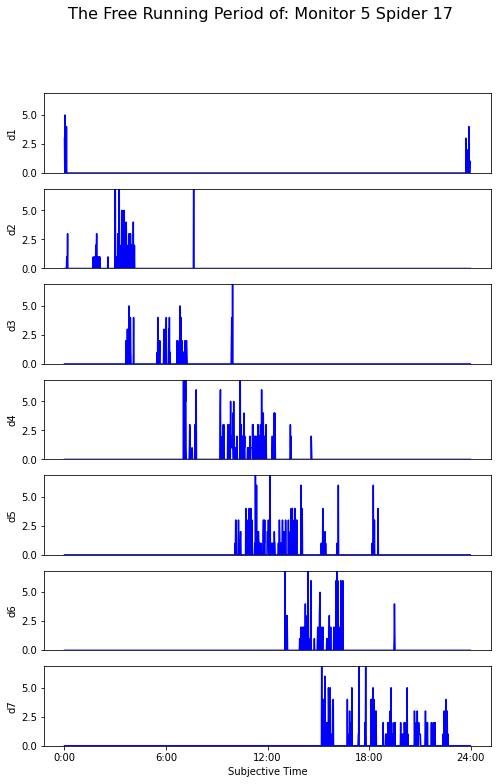

Next spider
Monitor 5 Spider 18


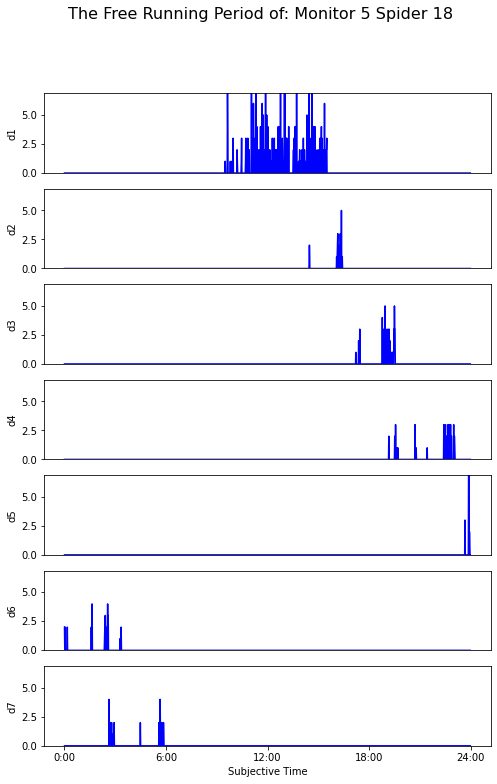

Next spider
Monitor 5 Spider 19


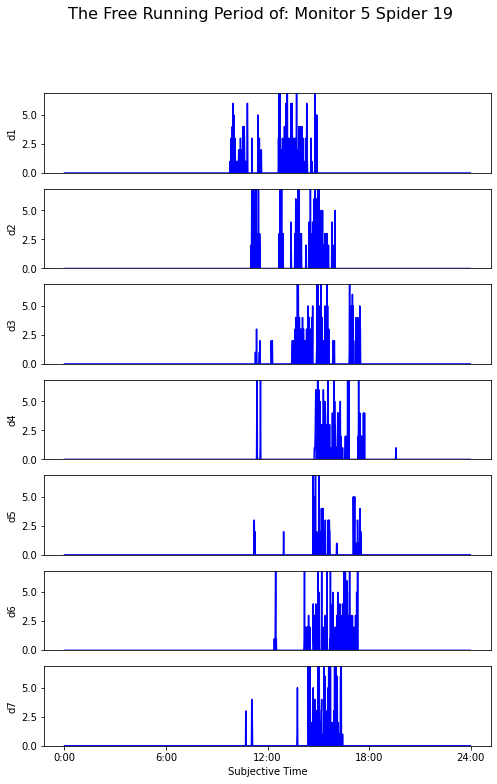

Next spider
Monitor 5 Spider 20


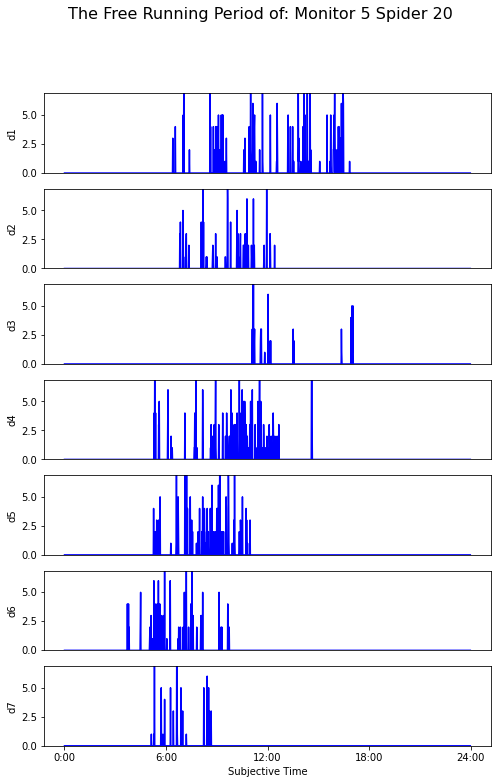

Next spider
Monitor 5 Spider 21


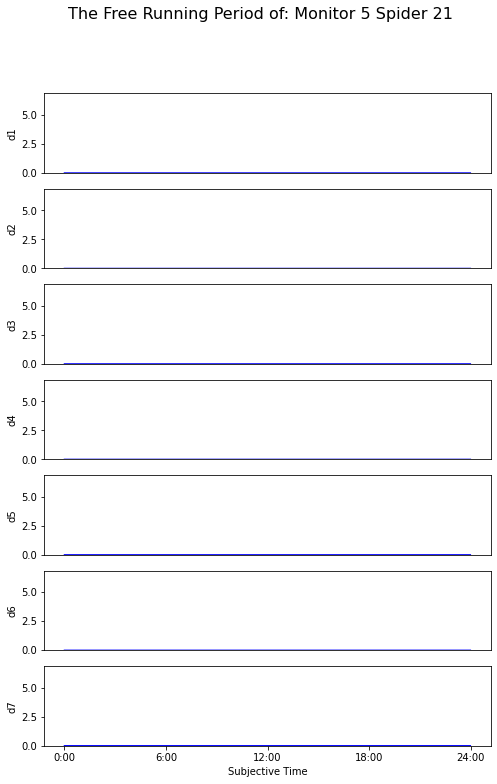

Next spider
Monitor 5 Spider 22


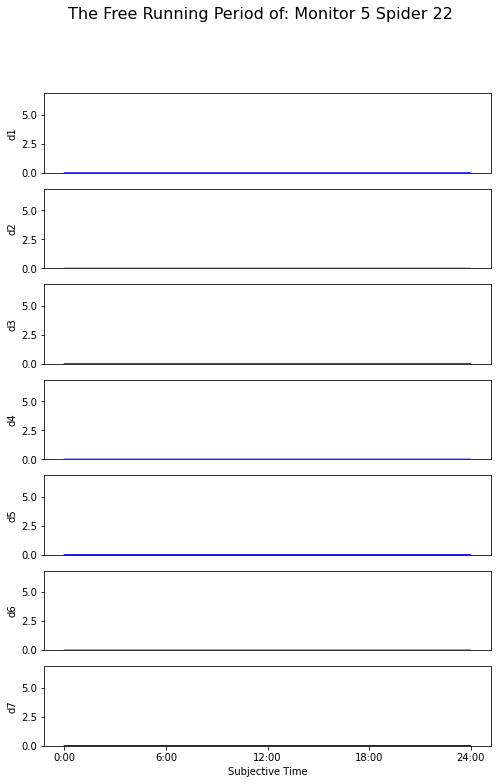

Next spider
Monitor 5 Spider 23


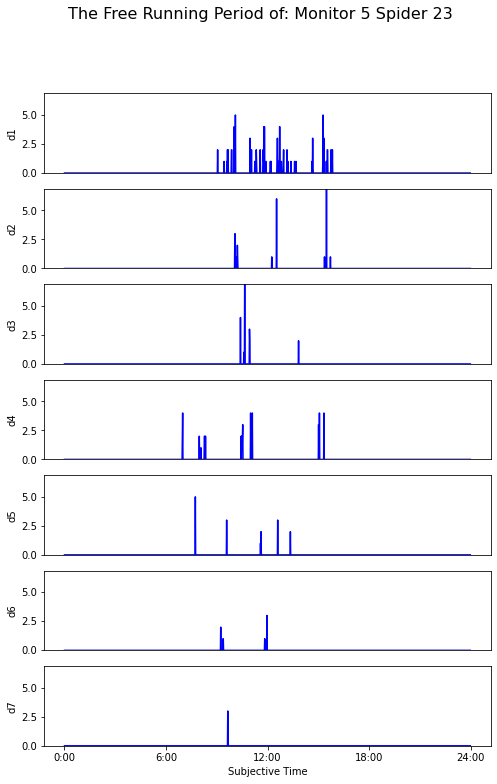

Next spider
Monitor 5 Spider 24


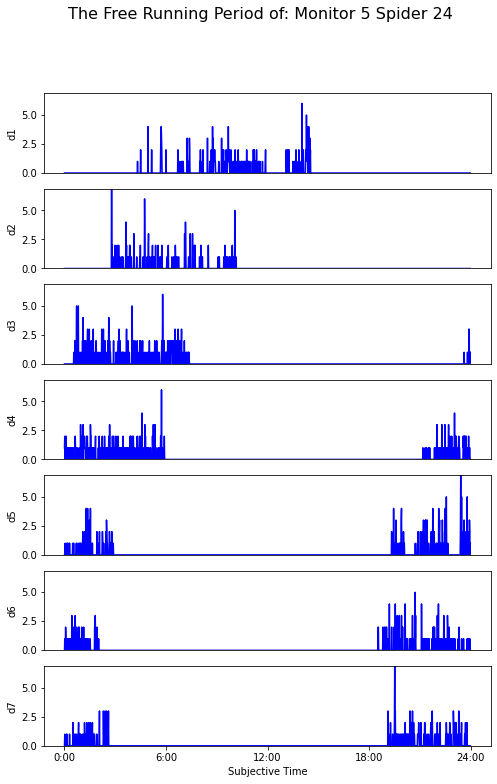

Next spider
Monitor 5 Spider 25


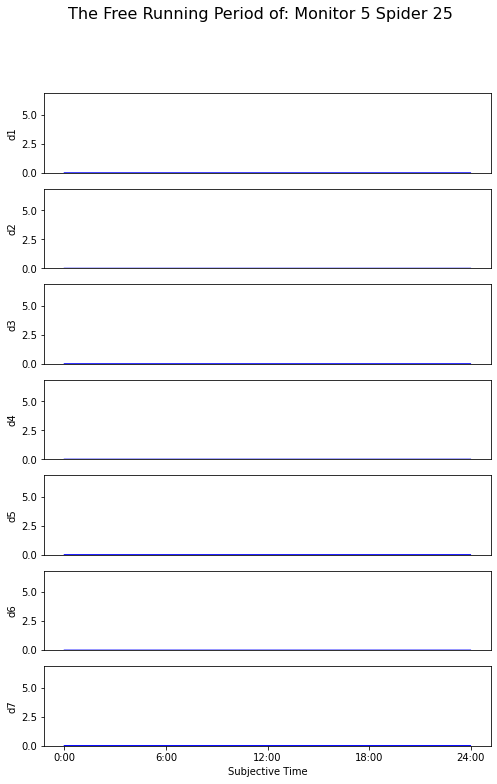

Next spider
Monitor 5 Spider 26


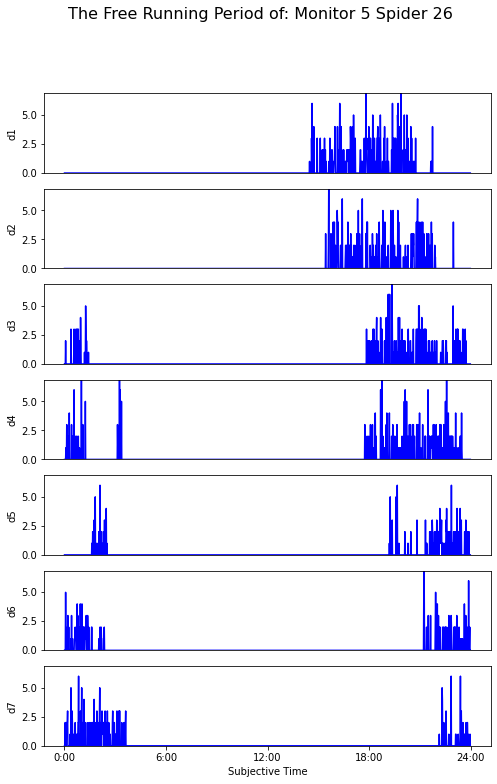

Next spider
Monitor 5 Spider 27


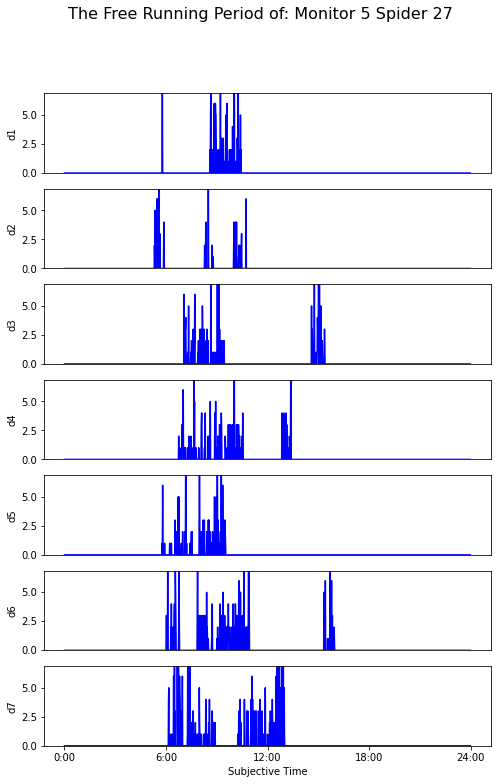

Next spider
Monitor 5 Spider 28


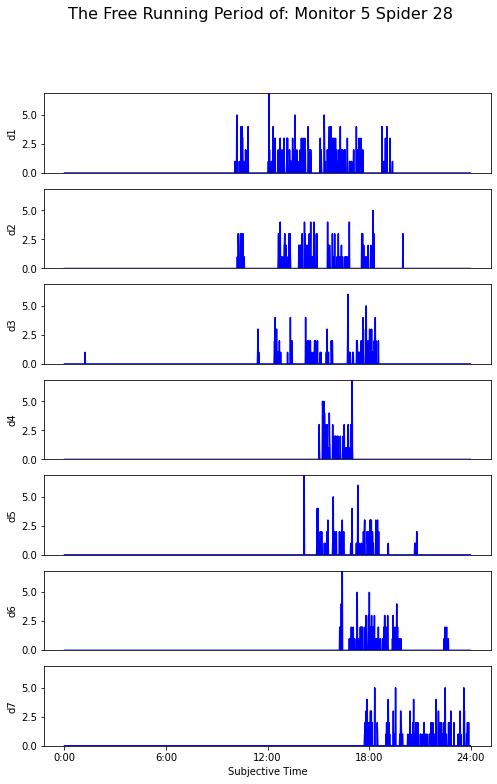

Next spider
Monitor 5 Spider 29


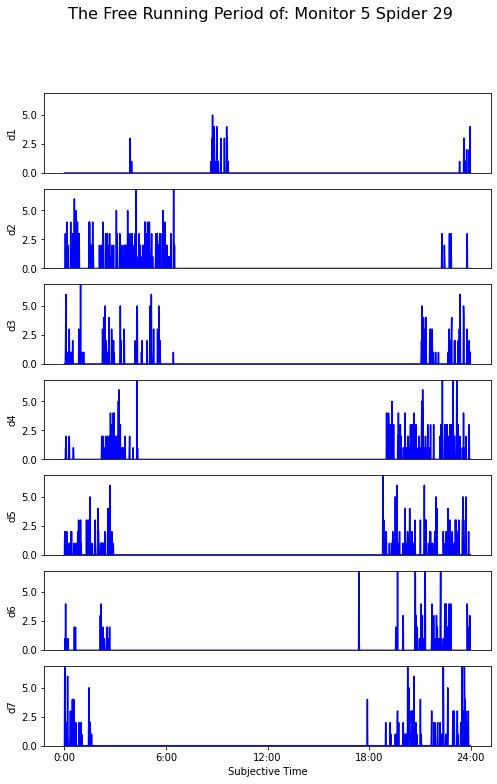

Next spider
Monitor 5 Spider 30


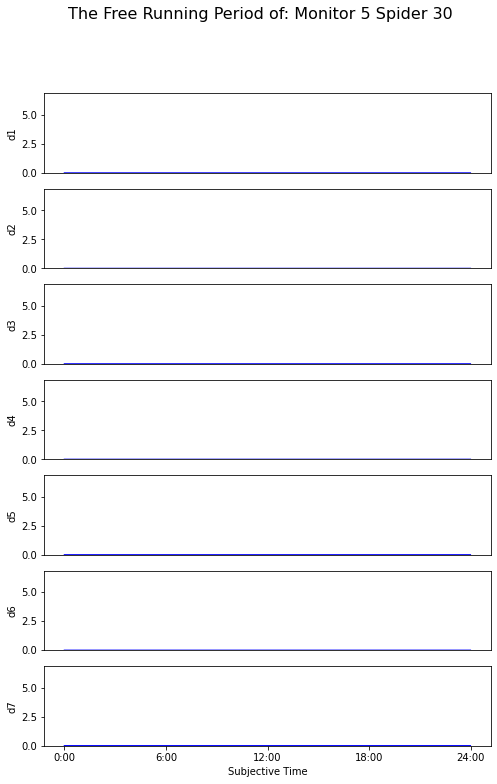

Next spider
Monitor 5 Spider 31


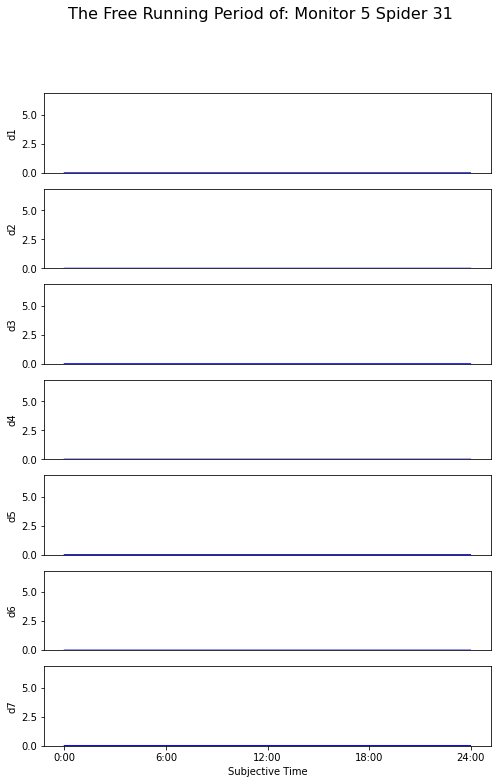

Next spider
Monitor 5 Spider 32


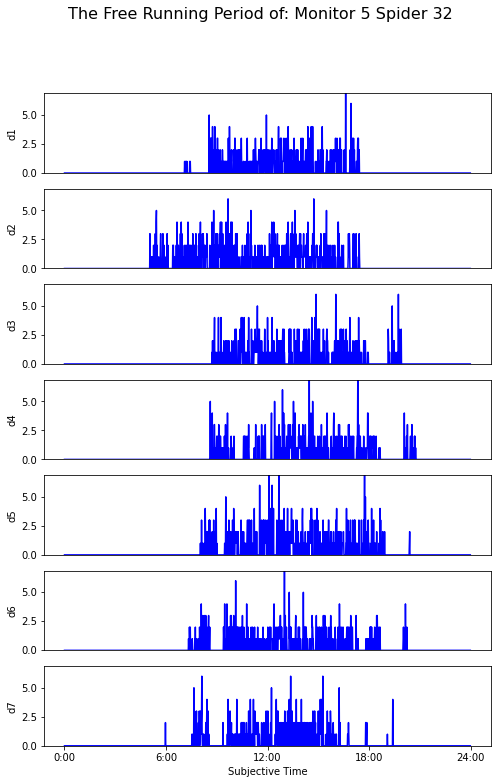

Next spider


In [10]:
spider_raster(dfa)